In [ ]:
#HW4
#Jane Anna Vickery

In [32]:
import math 
import numpy as np
import pandas as pd
from random import sample
from random import choices
import matplotlib.pyplot as plt


In [16]:
#2g
#computing the probability for each interger n with the equation listed below
def compute_prob(n) :
    return 1 - (1-1/n)**n

In [17]:
#2g
#create an array, so we can loop through each interger value from 1-100,000
#go to 100,001 because arrays are not inclusive
arr = np.arange(1,100001)
probs = {}

#looping through the probability of each interger value
for n in arr :
    probs[n] = compute_prob(n)
    
lists = sorted(probs.items())
x, y = zip(*lists)

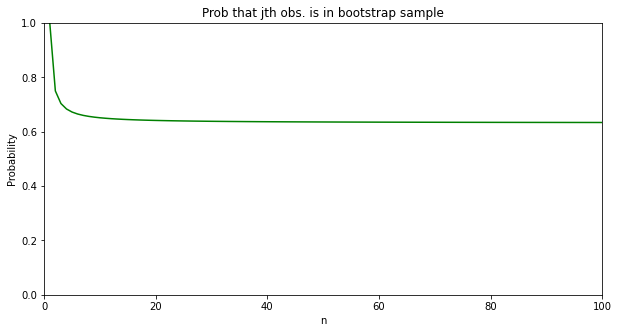

In [30]:
#2g
#creating the plot/ graph of the bootrap sample
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(x, y, color='g')
ax.set_xlabel('n')
ax.set_ylabel('Probability')
ax.set_title('Prob that jth obs. is in bootstrap sample')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
plt.show()

In [ ]:
#2g
#the green line represents 1-(1-1/n)^n which equals about .632

In [31]:
#2h
n = 10000 #number of bootstrap samples
m = 100 #number of training data
j = 4 #the picked training data
store = np.arange(1,n+1,dtype=int)
for i in range(n):
	temp=sum(np.array(choices(range(m+1),k=m)) == j).astype(int)
	store[i]=(temp>0).astype(int)
print('true probability of having jth observation = ',1-math.exp(-1))
print('simulated probability of having jth observation = ',store.mean())

true probability of having jth observation =  0.6321205588285577
simulated probability of having jth observation =  0.6322


In [ ]:
#2h
#We create 10,000 bootstrap samples from 1-100 then calculate what proportion of them contained 4
#The selected probability is equal to approximately 1-e^-1

In [100]:
#11
caravan_data = pd.read_csv("Caravan.csv")

In [105]:
#11a
#training set of first 1,000 observations
train = caravan_data.iloc[0:1000, :]
#testing set with all other observations
test = caravan_data.iloc[1000:, :]
print(train.shape)
print(test.shape)

(1000, 86)
(4822, 86)


In [68]:
#11b
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [95]:
#11b
#seperate into training and testing data
X_train = train.drop (['Purchase'], axis=1)
X_test = train.drop (['Purchase'], axis=1)
y_train = train[['Purchase']]
y_test= train[['Purchase']]
#add the gradient boosting classidfier
gbr = GradientBoostingClassifier (learning_rate=0.01, n_estimators=1000)
gbr.fit(X=X_train, y=y_train.values.ravel())
p = gbr.predict(X_test)
print( "Test Error Rate is: " + str(1-accuracy_score (p, y_test)) )

Test Error Rate is: 0.030000000000000027


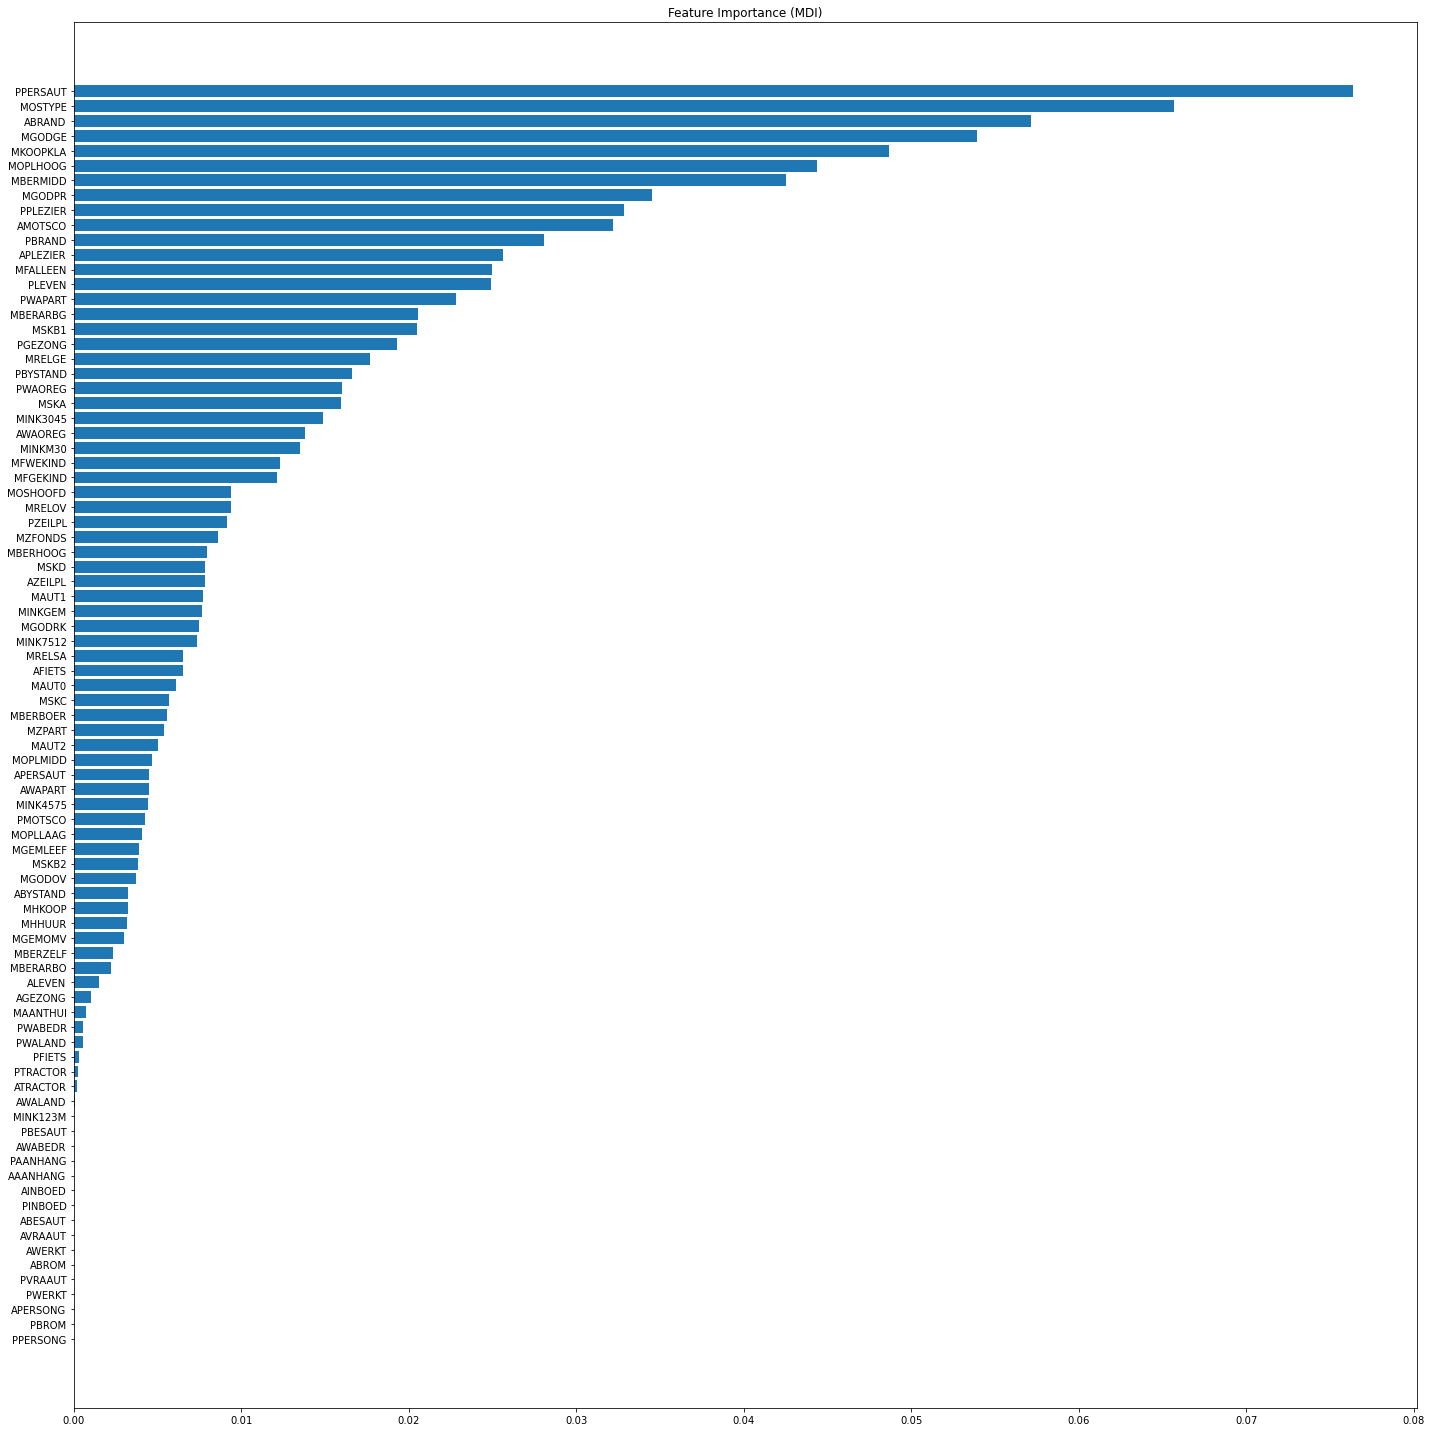

In [87]:
#11b
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Get Feature importance data using feature_importances_ attribute

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(caravan_data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

In [88]:
#11b
#As you can see from the bar plot above,PPERSAUT and MOSTYPE appear to be the most important

In [94]:
#11c
y_pred = pd.Series(p)
y_true = (y_test['Purchase'])
y_true.reset_index(drop=True, inplace=True)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
True,,,
No,941,0,941
Yes,30,29,59
All,971,29,1000


In [ ]:
#11c
#The percentage of people who are predicted to make a purchase and make one is 24.19%.